In [1]:
#import libraries

from IPython.display import display, HTML
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import re
import pandas as pd
import requests
import smtplib
import time
import datetime

In [2]:
#Now lets scrape the HLTV website

URL = 'https://www.hltv.org/stats/players?startDate=2024-01-01&endDate=2024-12-31&rankingFilter=Top20'
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0'}
page = requests.get(URL, headers=h)
soup = BeautifulSoup(page.content, 'html.parser')
#soup = BeautifulSoup(soup.prettify(),'html.parser')
print (soup)

<!DOCTYPE html>

<html data-bc-content-allowed="true" data-client-country-iso="pt" data-impression-tracking-endpoint="https://ncuxt.hltv.org" lang="en"><!--Active rewriter version: 1-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" id="metaViewport" name="viewport"/>
<meta content="1004164229" property="fb:admins"/>
<meta content="249997999009" property="fb:pages"/>
<meta content="1460388157605817" property="fb:app_id"/>
<meta content="DcypRFLQvgYQL5Acx7feoGWbblSsmKv6HpPI7mM_1uw" name="google-site-verification"/>
<meta content="5OtriQwtVytxCNrtDRVt0gtjmAN81BJ9Z6ZLLCXEYwQ" name="google-site-verification"/>
<meta content="00ed04feb3ede037" name="yandex-verification"/>
<link href="/img/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/img/static/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<li

In [3]:
table = soup.find('table', class_='stats-table player-ratings-table')
print(table)

<table class="stats-table player-ratings-table">
<thead>
<tr class="stats-table-row">
<th class="playerCol">Player</th>
<th class="teamCol">Teams</th>
<th class="mapsCol">Maps</th>
<th class="rounds-col gtSmartphone-only">Rounds</th>
<th class="kdDiffCol">K-D Diff</th>
<th class="kdCol">K/D</th>
<th class="ratingCol">Rating<span class="ratingDesc">2.0</span></th>
</tr>
</thead>
<tbody>
<tr>
<td class="playerCol"><img alt="Russia" class="flag" src="/img/static/flags/30x20/RU.gif" title="Russia"/><a data-tooltip-id="uniqueTooltipId--1064468357" href="/stats/players/19230/m0nesy?startDate=2024-01-01&amp;endDate=2024-12-31&amp;rankingFilter=Top20">m0NESY</a></td>
<td class="teamCol" data-sort="G2"><a data-tooltip-id="uniqueTooltipId--1110362809" href="/stats/teams/5995/g2?startDate=2024-01-01&amp;endDate=2024-12-31&amp;rankingFilter=Top20"><img alt="G2" class="logo" src="https://img-cdn.hltv.org/teamlogo/zFLwAELOD15BjJSDMMNBWQ.png?ixlib=java-2.1.0&amp;w=50&amp;s=affb583e6716d8ee90482699225

In [4]:
headers = list(head.get_text() for head in table.find_all('th'))

#for head in headers:
    #print (head.get_text())
print(headers)

['Player', 'Teams', 'Maps', 'Rounds', 'K-D\xa0Diff', 'K/D', 'Rating2.0']


In [5]:
df = pd.DataFrame(columns = headers)
df

,Player,Teams,Maps,Rounds,K-D Diff,K/D,Rating2.0


In [6]:
df.rename(columns={'Rating2.0': 'Rating (2.0)'}, inplace=True)

In [7]:
df

,Player,Teams,Maps,Rounds,K-D Diff,K/D,Rating (2.0)


In [8]:
#Getting data from the top 10 players

#all <tr>
all_rows = table.find_all('tr')[1:11]

#all <td>
for row in all_rows:
    #finding all <td> tags within the <tr>
    table_data = row.find_all('td')

    #getting text from <td>
    td_texts = [td.get_text(strip=True) for td in table_data] 
    #print(td_texts)
    length = len(df)
    df.loc[length] = td_texts

df

,Player,Teams,Maps,Rounds,K-D Diff,K/D,Rating (2.0)
0,m0NESY,,49,1080,+309,1.50,1.35
1,XANTARES,,43,920,+67,1.11,1.20
2,broky,,63,1355,+224,1.28,1.19
3,FL1T,,42,884,+49,1.09,1.16
4,jL,,43,967,+93,1.15,1.16
5,frozen,,63,1355,+121,1.14,1.15
6,w0nderful,,43,967,+154,1.27,1.15
7,fame,,42,884,+30,1.05,1.13
8,NiKo,,49,1080,+68,1.10,1.13
9,electroNic,,45,977,-6,0.99,1.11


In [9]:
team_names = []
for row in all_rows:
    # Find all elements with the class "teamCol"
    team = row.find(class_="teamCol")['data-sort']
    # Append all to team_names
    team_names.append(team)

print (team_names)

['G2', 'Eternal Fire', 'FaZe', 'Virtus.pro', 'Natus Vincere', 'FaZe', 'Natus Vincere', 'Virtus.pro', 'G2', 'Virtus.pro']


In [10]:
df['Teams']=team_names

In [11]:
df

,Player,Teams,Maps,Rounds,K-D Diff,K/D,Rating (2.0)
0,m0NESY,G2,49,1080,+309,1.50,1.35
1,XANTARES,Eternal Fire,43,920,+67,1.11,1.20
2,broky,FaZe,63,1355,+224,1.28,1.19
3,FL1T,Virtus.pro,42,884,+49,1.09,1.16
4,jL,Natus Vincere,43,967,+93,1.15,1.16
5,frozen,FaZe,63,1355,+121,1.14,1.15
6,w0nderful,Natus Vincere,43,967,+154,1.27,1.15
7,fame,Virtus.pro,42,884,+30,1.05,1.13
8,NiKo,G2,49,1080,+68,1.10,1.13
9,electroNic,Virtus.pro,45,977,-6,0.99,1.11


In [12]:
#Adding countries just for fun

countries = []
for row in all_rows:
    # Find all elements with the class "teamCol"
    country = row.find(class_="flag")['alt']
    # Append all to team_names
    countries.append(country)

print (countries)

['Russia', 'Turkey', 'Latvia', 'Russia', 'Lithuania', 'Slovakia', 'Ukraine', 'Russia', 'Bosnia and Herzegovina', 'Russia']


In [13]:
df['Countries']=countries

In [14]:
df

,Player,Teams,Maps,Rounds,K-D Diff,K/D,Rating (2.0),Countries
0,m0NESY,G2,49,1080,+309,1.50,1.35,Russia
1,XANTARES,Eternal Fire,43,920,+67,1.11,1.20,Turkey
2,broky,FaZe,63,1355,+224,1.28,1.19,Latvia
3,FL1T,Virtus.pro,42,884,+49,1.09,1.16,Russia
4,jL,Natus Vincere,43,967,+93,1.15,1.16,Lithuania
5,frozen,FaZe,63,1355,+121,1.14,1.15,Slovakia
6,w0nderful,Natus Vincere,43,967,+154,1.27,1.15,Ukraine
7,fame,Virtus.pro,42,884,+30,1.05,1.13,Russia
8,NiKo,G2,49,1080,+68,1.10,1.13,Bosnia and Herzegovina
9,electroNic,Virtus.pro,45,977,-6,0.99,1.11,Russia


In [15]:
list (df.columns.tolist())

['Player',
 'Teams',
 'Maps',
 'Rounds',
 'K-D\xa0Diff',
 'K/D',
 'Rating (2.0)',
 'Countries']

In [16]:
new_order = ['Player','Countries','Teams','Maps','Rounds','K-D\xa0Diff','K/D','Rating (2.0)']

In [17]:
df = df[new_order]

In [18]:
#Append the year of the data

heads = []
for head in list (df.columns):
    head = (head+" (2024)")
    #print (head)
    heads.append(head)
print(heads)
df.columns = heads

['Player (2024)', 'Countries (2024)', 'Teams (2024)', 'Maps (2024)', 'Rounds (2024)', 'K-D\xa0Diff (2024)', 'K/D (2024)', 'Rating (2.0) (2024)']


In [19]:
df

,Player (2024),Countries (2024),Teams (2024),Maps (2024),Rounds (2024),K-D Diff (2024),K/D (2024),Rating (2.0) (2024)
0,m0NESY,Russia,G2,49,1080,+309,1.50,1.35
1,XANTARES,Turkey,Eternal Fire,43,920,+67,1.11,1.20
2,broky,Latvia,FaZe,63,1355,+224,1.28,1.19
3,FL1T,Russia,Virtus.pro,42,884,+49,1.09,1.16
4,jL,Lithuania,Natus Vincere,43,967,+93,1.15,1.16
5,frozen,Slovakia,FaZe,63,1355,+121,1.14,1.15
6,w0nderful,Ukraine,Natus Vincere,43,967,+154,1.27,1.15
7,fame,Russia,Virtus.pro,42,884,+30,1.05,1.13
8,NiKo,Bosnia and Herzegovina,G2,49,1080,+68,1.10,1.13
9,electroNic,Russia,Virtus.pro,45,977,-6,0.99,1.11


In [20]:
#df.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2024.csv")

In [21]:
#All years automation

from IPython.display import display, HTML
from bs4 import BeautifulSoup
import pandas as pd
import re
import pandas as pd
import requests
import smtplib
import time
import datetime

current_year = 2024

while current_year >= 2020: 
    URL = f'https://www.hltv.org/stats/players?startDate={current_year}-01-01&endDate={current_year}-12-31&rankingFilter=Top20'
    h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0'}
    page = requests.get(URL, headers=h)
    soup = BeautifulSoup(page.content, 'html.parser')
    #print(soup.prettify())
    
    table = soup.find('table', class_='stats-table player-ratings-table')
    headers = list(head.get_text() for head in table.find_all('th'))
    df = pd.DataFrame(columns=headers)
    df.rename(columns={'Rating2.0': 'Rating (2.0)'}, inplace=True)
    all_rows = table.find_all('tr')[1:]

    for row in all_rows:
        table_data = row.find_all('td')
        td_texts = [td.get_text(strip=True) for td in table_data] 
        length = len(df)
        df.loc[length] = td_texts
        
    team_names = [row.find(class_="teamCol")['data-sort'] for row in all_rows]
    df['Teams'] = team_names
    countries = [row.find(class_="flag")['alt'] for row in all_rows]
    df['Countries'] = countries
    
    new_order = ['Player', 'Countries', 'Teams', 'Maps', 'Rounds', 'K-D\xa0Diff', 'K/D', 'Rating (2.0)']
    df = df[new_order]
    df.columns = [f"{head} ({current_year})" if head not in ['Player', 'Countries'] else head for head in df.columns]

    year_csv = str (current_year)
    df.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS "+year_csv+".csv")
    df.to_excel(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\Excelplayers\CS "+year_csv+".xlsx")
    
    current_year -= 1

In [22]:
#putting all CSV in data frame

df_24 = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2024.csv")
df_23 = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2023.csv")
df_22 = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2022.csv")
df_21 = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2021.csv")
df_20 = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CS 2020.csv")

dfs = [df_24,df_23,df_22,df_21,df_20]

for df in dfs:
    display (df)

,Unnamed: 0,Player,Countries,Teams (2024),Maps (2024),Rounds (2024),K-D Diff (2024),K/D (2024),Rating (2.0) (2024)
0,0,m0NESY,Russia,G2,49,1080,309,1.50,1.35
1,1,XANTARES,Turkey,Eternal Fire,43,920,67,1.11,1.20
2,2,broky,Latvia,FaZe,63,1355,224,1.28,1.19
3,3,FL1T,Russia,Virtus.pro,42,884,49,1.09,1.16
4,4,jL,Lithuania,Natus Vincere,43,967,93,1.15,1.16
5,5,frozen,Slovakia,FaZe,63,1355,121,1.14,1.15
6,6,w0nderful,Ukraine,Natus Vincere,43,967,154,1.27,1.15
7,7,fame,Russia,Virtus.pro,42,884,30,1.05,1.13
8,8,NiKo,Bosnia and Herzegovina,G2,49,1080,68,1.10,1.13
9,9,electroNic,Russia,Virtus.pro,45,977,-6,0.99,1.11


,Unnamed: 0,Player,Countries,Teams (2023),Maps (2023),Rounds (2023),K-D Diff (2023),K/D (2023),Rating (2.0) (2023)
0,0,ZywOo,France,Vitality,119,3117,683,1.38,1.28
1,1,device,Denmark,Astralis,110,2902,517,1.30,1.21
2,2,sh1ro,Russia,Cloud9,124,3369,682,1.36,1.20
3,3,NiKo,Bosnia and Herzegovina,G2,113,2941,349,1.19,1.19
4,4,frozen,Slovakia,MOUZ,112,2792,399,1.25,1.19
5,5,blameF,Denmark,Astralis,110,2902,366,1.21,1.18
6,6,m0NESY,Russia,G2,113,2941,420,1.24,1.17
7,7,Spinx,Israel,Vitality,119,3117,390,1.20,1.17
8,8,ropz,Estonia,FaZe,162,4143,553,1.22,1.16
9,9,Jame,Russia,Virtus.pro,111,2804,469,1.33,1.16


,Unnamed: 0,Player,Countries,Teams (2022),Maps (2022),Rounds (2022),K-D Diff (2022),K/D (2022),Rating (2.0) (2022)
0,0,sh1ro,Russia,Cloud9,103,2745,686,1.47,1.26
1,1,s1mple,Ukraine,Natus Vincere,116,3121,672,1.35,1.26
2,2,ZywOo,France,Vitality,131,3611,687,1.32,1.24
3,3,blameF,Denmark,Astralis,136,3804,557,1.23,1.21
4,4,Ax1Le,Russia,Cloud9,103,2745,340,1.20,1.21
5,5,NiKo,Bosnia and Herzegovina,G2,116,3192,310,1.15,1.20
6,6,stavn,Denmark,HEROIC,120,3224,314,1.15,1.16
7,7,m0NESY,Russia,G2,116,3192,443,1.23,1.15
8,8,frozen,Slovakia,MOUZ,118,3124,359,1.20,1.14
9,9,YEKINDAR,Latvia,Liquid,111,3008,142,1.07,1.14


,Unnamed: 0,Player,Countries,Teams (2021),Maps (2021),Rounds (2021),K-D Diff (2021),K/D (2021),Rating (2.0) (2021)
0,0,s1mple,Ukraine,Natus Vincere,176,4681,1255,1.45,1.34
1,1,ZywOo,France,Vitality,150,4001,888,1.37,1.29
2,2,sh1ro,Russia,Gambit,197,5276,1148,1.42,1.22
3,3,NiKo,Bosnia and Herzegovina,G2,174,4751,510,1.16,1.19
4,4,HObbit,Kazakhstan,Gambit,197,5276,517,1.15,1.16
5,5,Ax1Le,Russia,Gambit,197,5276,510,1.15,1.16
6,6,Jame,Russia,Virtus.pro,162,4439,669,1.28,1.14
7,7,device,Denmark,Ninjas in Pyjamas,155,4113,423,1.16,1.14
8,8,electroNic,Russia,Natus Vincere,176,4681,314,1.10,1.13
9,9,YEKINDAR,Latvia,Virtus.pro,162,4439,65,1.02,1.13


,Unnamed: 0,Player,Countries,Teams (2020),Maps (2020),Rounds (2020),K-D Diff (2020),K/D (2020),Rating (2.0) (2020)
0,0,ZywOo,France,Vitality,186,5010,953,1.31,1.28
1,1,s1mple,Ukraine,Natus Vincere,168,4444,1083,1.40,1.28
2,2,device,Denmark,Astralis,179,4733,727,1.25,1.20
3,3,NiKo,Bosnia and Herzegovina,G2,166,4533,436,1.14,1.18
4,4,ropz,Estonia,MOUZ,138,3629,484,1.21,1.16
5,5,electroNic,Russia,Natus Vincere,168,4444,319,1.11,1.14
6,6,syrsoN,Germany,BIG,165,4533,387,1.14,1.12
7,7,mantuu,Poland,OG,156,4233,425,1.17,1.10
8,8,stavn,Denmark,HEROIC,143,3901,100,1.04,1.09
9,9,dupreeh,Denmark,Astralis,179,4733,270,1.09,1.09


In [23]:
#Removing all the useless columns

for df in dfs:
    df.drop(df.columns[3], axis=1, inplace=True)
    df.drop(df.columns[0], axis=1, inplace=True)
    display (df)

,Player,Countries,Maps (2024),Rounds (2024),K-D Diff (2024),K/D (2024),Rating (2.0) (2024)
0,m0NESY,Russia,49,1080,309,1.50,1.35
1,XANTARES,Turkey,43,920,67,1.11,1.20
2,broky,Latvia,63,1355,224,1.28,1.19
3,FL1T,Russia,42,884,49,1.09,1.16
4,jL,Lithuania,43,967,93,1.15,1.16
5,frozen,Slovakia,63,1355,121,1.14,1.15
6,w0nderful,Ukraine,43,967,154,1.27,1.15
7,fame,Russia,42,884,30,1.05,1.13
8,NiKo,Bosnia and Herzegovina,49,1080,68,1.10,1.13
9,electroNic,Russia,45,977,-6,0.99,1.11


,Player,Countries,Maps (2023),Rounds (2023),K-D Diff (2023),K/D (2023),Rating (2.0) (2023)
0,ZywOo,France,119,3117,683,1.38,1.28
1,device,Denmark,110,2902,517,1.30,1.21
2,sh1ro,Russia,124,3369,682,1.36,1.20
3,NiKo,Bosnia and Herzegovina,113,2941,349,1.19,1.19
4,frozen,Slovakia,112,2792,399,1.25,1.19
5,blameF,Denmark,110,2902,366,1.21,1.18
6,m0NESY,Russia,113,2941,420,1.24,1.17
7,Spinx,Israel,119,3117,390,1.20,1.17
8,ropz,Estonia,162,4143,553,1.22,1.16
9,Jame,Russia,111,2804,469,1.33,1.16


,Player,Countries,Maps (2022),Rounds (2022),K-D Diff (2022),K/D (2022),Rating (2.0) (2022)
0,sh1ro,Russia,103,2745,686,1.47,1.26
1,s1mple,Ukraine,116,3121,672,1.35,1.26
2,ZywOo,France,131,3611,687,1.32,1.24
3,blameF,Denmark,136,3804,557,1.23,1.21
4,Ax1Le,Russia,103,2745,340,1.20,1.21
5,NiKo,Bosnia and Herzegovina,116,3192,310,1.15,1.20
6,stavn,Denmark,120,3224,314,1.15,1.16
7,m0NESY,Russia,116,3192,443,1.23,1.15
8,frozen,Slovakia,118,3124,359,1.20,1.14
9,YEKINDAR,Latvia,111,3008,142,1.07,1.14


,Player,Countries,Maps (2021),Rounds (2021),K-D Diff (2021),K/D (2021),Rating (2.0) (2021)
0,s1mple,Ukraine,176,4681,1255,1.45,1.34
1,ZywOo,France,150,4001,888,1.37,1.29
2,sh1ro,Russia,197,5276,1148,1.42,1.22
3,NiKo,Bosnia and Herzegovina,174,4751,510,1.16,1.19
4,HObbit,Kazakhstan,197,5276,517,1.15,1.16
5,Ax1Le,Russia,197,5276,510,1.15,1.16
6,Jame,Russia,162,4439,669,1.28,1.14
7,device,Denmark,155,4113,423,1.16,1.14
8,electroNic,Russia,176,4681,314,1.10,1.13
9,YEKINDAR,Latvia,162,4439,65,1.02,1.13


,Player,Countries,Maps (2020),Rounds (2020),K-D Diff (2020),K/D (2020),Rating (2.0) (2020)
0,ZywOo,France,186,5010,953,1.31,1.28
1,s1mple,Ukraine,168,4444,1083,1.40,1.28
2,device,Denmark,179,4733,727,1.25,1.20
3,NiKo,Bosnia and Herzegovina,166,4533,436,1.14,1.18
4,ropz,Estonia,138,3629,484,1.21,1.16
5,electroNic,Russia,168,4444,319,1.11,1.14
6,syrsoN,Germany,165,4533,387,1.14,1.12
7,mantuu,Poland,156,4233,425,1.17,1.10
8,stavn,Denmark,143,3901,100,1.04,1.09
9,dupreeh,Denmark,179,4733,270,1.09,1.09


In [24]:
#concatenate all tables into one
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

big_df = pd.concat(dfs)

In [25]:
big_df = big_df.groupby(['Player','Countries']).mean().sort_values(by='Player')
big_df.sort_index(axis=1,inplace=True)

In [26]:
up = list(big_df.columns)
uppers = []
for u in up:
    u = u.split('(')[0].strip()
    uppers.append(u)

In [27]:
uppers = set(uppers)
uppers = list(uppers)

In [28]:
uppers

['Rounds', 'K/D', 'Rating', 'Maps', 'K-D\xa0Diff']

In [29]:
uppers.sort()
uppers

['K-D\xa0Diff', 'K/D', 'Maps', 'Rating', 'Rounds']

In [30]:
years = [2020, 2021, 2022, 2023, 2024]
multi_index = pd.MultiIndex.from_product([uppers, years])
data = big_df.values
big_df_fixed = pd.DataFrame(data, index=big_df.index, columns=multi_index)

In [31]:
big_df_fixed.columns

MultiIndex([('K-D Diff', 2020),
            ('K-D Diff', 2021),
            ('K-D Diff', 2022),
            ('K-D Diff', 2023),
            ('K-D Diff', 2024),
            (     'K/D', 2020),
            (     'K/D', 2021),
            (     'K/D', 2022),
            (     'K/D', 2023),
            (     'K/D', 2024),
            (    'Maps', 2020),
            (    'Maps', 2021),
            (    'Maps', 2022),
            (    'Maps', 2023),
            (    'Maps', 2024),
            (  'Rating', 2020),
            (  'Rating', 2021),
            (  'Rating', 2022),
            (  'Rating', 2023),
            (  'Rating', 2024),
            (  'Rounds', 2020),
            (  'Rounds', 2021),
            (  'Rounds', 2022),
            (  'Rounds', 2023),
            (  'Rounds', 2024)],
           )

In [32]:
big_df_fixed

K-D Diff                               K/D             \
                        2020   2021   2022   2023   2024  2020  2021 2022   
Player    Countries                                                         
AMANEK    France      -258.0 -106.0    NaN    NaN    NaN  0.90  0.96  NaN   
Aleksib   Finland     -349.0    NaN    NaN -312.0 -151.0  0.88   NaN  NaN   
Ax1Le     Russia         NaN  510.0  340.0  215.0    NaN   NaN  1.15  1.2   
Boombl4   Russia      -337.0 -353.0    NaN    NaN    NaN  0.89  0.89  NaN   
Brollan   Sweden       179.0    NaN    NaN -200.0    NaN  1.07   NaN  NaN   
...                      ...    ...    ...    ...    ...   ...   ...  ...   
valde     Denmark      221.0    NaN    NaN    NaN    NaN  1.08   NaN  NaN   
w0nderful Ukraine        NaN    NaN    NaN    NaN  154.0   NaN   NaN  NaN   
woxic     Turkey         NaN    NaN    NaN    NaN   68.0   NaN   NaN  NaN   
xertioN   Israel         NaN    NaN    NaN  -47.0    NaN   NaN   NaN  NaN   
yuurih    Brazil         NaN    NaN    NaN   14.0    NaN   NaN   NaN  NaN   

                                 ... Rating                          Rounds  \
                     2023  2024  ...   2020  2021  2022  2023  2024    2020   
Player    Countries              ...                                          
AMANEK    France      NaN   NaN  ...   0.96  0.99   NaN   NaN   NaN  3808.0   
Aleksib   Finland    0.86  0.77  ...   0.98   NaN   NaN  0.94  0.90  4233.0   
Ax1Le     Russia     1.09   NaN  ...    NaN  1.16  1.21  1.11   NaN     NaN   
Boombl4   Russia      NaN   NaN  ...   0.98  0.98   NaN   NaN   NaN  4444.0   
Brollan   Sweden     0.90   NaN  ...   1.08   NaN   NaN  1.00   NaN  3991.0   
...                   ...   ...  ...    ...   ...   ...   ...   ...     ...   
valde     Denmark     NaN   NaN  ...   1.09   NaN   NaN   NaN   NaN  4233.0   
w0nderful Ukraine     NaN  1.27  ...    NaN   NaN   NaN   NaN  1.15     NaN   
woxic     Turkey      NaN  1.12  ...    NaN   NaN   NaN   NaN  1.10     NaN   
xertioN   Israel     0.98   NaN  ...    NaN   NaN   NaN  1.08   NaN     NaN   
yuurih    Brazil     1.01   NaN  ...    NaN   NaN   NaN  1.06   NaN     NaN   

                                                    
                       2021    2022    2023   2024  
Player    Countries                                 
AMANEK    France     4751.0     NaN     NaN    NaN  
Aleksib   Finland       NaN     NaN  3351.0  967.0  
Ax1Le     Russia     5276.0  2745.0  3759.0    NaN  
Boombl4   Russia     4681.0     NaN     NaN    NaN  
Brollan   Sweden        NaN     NaN  2830.0    NaN  
...                     ...     ...     ...    ...  
valde     Denmark       NaN     NaN     NaN    NaN  
w0nderful Ukraine       NaN     NaN     NaN  967.0  
woxic     Turkey        NaN     NaN     NaN  920.0  
xertioN   Israel        NaN     NaN  2763.0    NaN  
yuurih    Brazil        NaN     NaN  2421.0    NaN  

[120 rows x 25 columns]

In [34]:
new_order_multi = [('K-D\xa0Diff', 2020),
            ('K-D\xa0Diff', 2021),
            ('K-D\xa0Diff', 2022),
            ('K-D\xa0Diff', 2023),
            ('K-D\xa0Diff', 2024),
            (     'K/D', 2020),
            (     'K/D', 2021),
            (     'K/D', 2022),
            (     'K/D', 2023),
            (     'K/D', 2024),
            (    'Maps', 2020),
            (    'Maps', 2021),
            (    'Maps', 2022),
            (    'Maps', 2023),
            (    'Maps', 2024),
            (  'Rounds', 2020),
            (  'Rounds', 2021),
            (  'Rounds', 2022),
            (  'Rounds', 2023),
            (  'Rounds', 2024),
            (  'Rating', 2020),
            (  'Rating', 2021),
            (  'Rating', 2022),
            (  'Rating', 2023),
            (  'Rating', 2024)]

In [35]:
big_df_fixed = big_df_fixed[new_order_multi]

In [36]:
big_df_fixed.columns

MultiIndex([('K-D Diff', 2020),
            ('K-D Diff', 2021),
            ('K-D Diff', 2022),
            ('K-D Diff', 2023),
            ('K-D Diff', 2024),
            (     'K/D', 2020),
            (     'K/D', 2021),
            (     'K/D', 2022),
            (     'K/D', 2023),
            (     'K/D', 2024),
            (    'Maps', 2020),
            (    'Maps', 2021),
            (    'Maps', 2022),
            (    'Maps', 2023),
            (    'Maps', 2024),
            (  'Rounds', 2020),
            (  'Rounds', 2021),
            (  'Rounds', 2022),
            (  'Rounds', 2023),
            (  'Rounds', 2024),
            (  'Rating', 2020),
            (  'Rating', 2021),
            (  'Rating', 2022),
            (  'Rating', 2023),
            (  'Rating', 2024)],
           )

In [37]:
big_df_fixed.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\Best CS pro 2020-24.csv")

In [38]:
#Now lets visualize some data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df1 = big_df_fixed

In [40]:
df1.columns

MultiIndex([('K-D Diff', 2020),
            ('K-D Diff', 2021),
            ('K-D Diff', 2022),
            ('K-D Diff', 2023),
            ('K-D Diff', 2024),
            (     'K/D', 2020),
            (     'K/D', 2021),
            (     'K/D', 2022),
            (     'K/D', 2023),
            (     'K/D', 2024),
            (    'Maps', 2020),
            (    'Maps', 2021),
            (    'Maps', 2022),
            (    'Maps', 2023),
            (    'Maps', 2024),
            (  'Rounds', 2020),
            (  'Rounds', 2021),
            (  'Rounds', 2022),
            (  'Rounds', 2023),
            (  'Rounds', 2024),
            (  'Rating', 2020),
            (  'Rating', 2021),
            (  'Rating', 2022),
            (  'Rating', 2023),
            (  'Rating', 2024)],
           )

In [41]:
#Removing players who only played in 1 year

sum_na = df1['K/D'].loc[:, '2020':'2024'].isna().sum(axis=1)
df1 = df1[sum_na != 4]
df1

K-D Diff                                K/D  \
                                      2020    2021   2022   2023   2024  2020   
Player     Countries                                                            
AMANEK     France                   -258.0  -106.0    NaN    NaN    NaN  0.90   
Aleksib    Finland                  -349.0     NaN    NaN -312.0 -151.0  0.88   
Ax1Le      Russia                      NaN   510.0  340.0  215.0    NaN   NaN   
Boombl4    Russia                   -337.0  -353.0    NaN    NaN    NaN  0.89   
Brollan    Sweden                    179.0     NaN    NaN -200.0    NaN  1.07   
EliGE      United States               NaN     NaN   59.0   90.0    NaN   NaN   
FL1T       Russia                      NaN     NaN    NaN   91.0   49.0   NaN   
HObbit     Kazakhstan                  NaN   517.0   99.0  -68.0    NaN   NaN   
HooXi      Denmark                     NaN     NaN    NaN -589.0 -175.0   NaN   
Jame       Russia                      NaN   669.0    NaN  469.0  100.0   NaN   
Maden      Montenegro                  NaN     NaN -165.0 -154.0    NaN   NaN   
Magisk     Denmark                   191.0     NaN  -48.0  109.0    NaN  1.06   
NertZ      Israel                      NaN     NaN    NaN   97.0   24.0   NaN   
NiKo       Bosnia and Herzegovina    436.0   510.0  310.0  349.0   68.0  1.14   
Perfecto   Russia                   -148.0   117.0   58.0   76.0    NaN  0.95   
Plopski    Sweden                    -16.0  -198.0    NaN    NaN    NaN  0.99   
REZ        Sweden                      9.0    55.0   92.0   87.0    NaN  1.00   
Snappi     Denmark                     NaN     NaN -353.0 -368.0    NaN   NaN   
Spinx      Israel                      NaN     NaN  276.0  390.0    NaN   NaN   
TeSeS      Denmark                     NaN    17.0   18.0  -65.0  -20.0   NaN   
Twistzz    Canada                      NaN   321.0  330.0  159.0    NaN   NaN   
XANTARES   Turkey                    227.0     NaN    NaN    NaN   67.0  1.08   
Xyp9x      Denmark                     NaN  -252.0 -340.0    NaN    NaN   NaN   
YEKINDAR   Latvia                      NaN    65.0  142.0    NaN    NaN   NaN   
ZywOo      France                    953.0   888.0  687.0  683.0    NaN  1.31   
apEX       France                   -292.0  -252.0 -489.0 -294.0    NaN  0.92   
b1t        Ukraine                     NaN   296.0  132.0  105.0   12.0   NaN   
blameF     Denmark                     NaN   299.0  557.0  366.0    NaN   NaN   
broky      Latvia                    285.0   308.0  530.0  429.0  224.0  1.11   
cadiaN     Denmark                   161.0   177.0  140.0  159.0    NaN  1.07   
device     Denmark                   727.0   423.0    NaN  517.0    NaN  1.25   
dupreeh    Denmark                   270.0     NaN  -70.0    NaN    NaN  1.09   
dycha      Poland                      NaN     NaN   97.0  -67.0    NaN   NaN   
electroNic Russia                    319.0   314.0   48.0   -9.0   -6.0  1.11   
fame       Russia                      NaN     NaN    NaN  101.0   30.0   NaN   
frozen     Slovakia                  130.0     NaN  359.0  399.0  121.0  1.05   
gla1ve     Denmark                  -182.0     NaN -366.0    NaN    NaN  0.94   
hampus     Sweden                      NaN  -102.0 -105.0    NaN    NaN   NaN   
huNter-    Bosnia and Herzegovina    127.0   287.0  232.0  108.0  -66.0  1.05   
interz     Russia                      NaN  -257.0    8.0    NaN    NaN   NaN   
jabbi      Denmark                     NaN     NaN   -1.0   99.0    NaN   NaN   
k0nfig     Denmark                     NaN     NaN   15.0  -74.0    NaN   NaN   
k1to       Germany                  -357.0  -406.0    NaN    NaN    NaN  0.89   
karrigan   Denmark                  -617.0     NaN -552.0 -675.0 -181.0  0.77   
m0NESY     Russia                      NaN     NaN  443.0  420.0  309.0   NaN   
misutaaa   France                   -220.0   -89.0    NaN    NaN    NaN  0.92   
nafany     Russia                      NaN  -221.0 -309.0 -367.0 

In [42]:
#Who are the top 10 players by Rating?
top10=df1['Rating'].mean(axis=1).sort_values(ascending=False)[:10]#.plot(kind='bar')
top10

Player    Countries             
s1mple    Ukraine                   1.293333
ZywOo     France                    1.272500
sh1ro     Russia                    1.226667
m0NESY    Russia                    1.223333
device    Denmark                   1.183333
NiKo      Bosnia and Herzegovina    1.178000
blameF    Denmark                   1.173333
Ax1Le     Russia                    1.160000
XANTARES  Turkey                    1.145000
FL1T      Russia                    1.140000
dtype: float64

<Axes: xlabel='Player,Countries'>

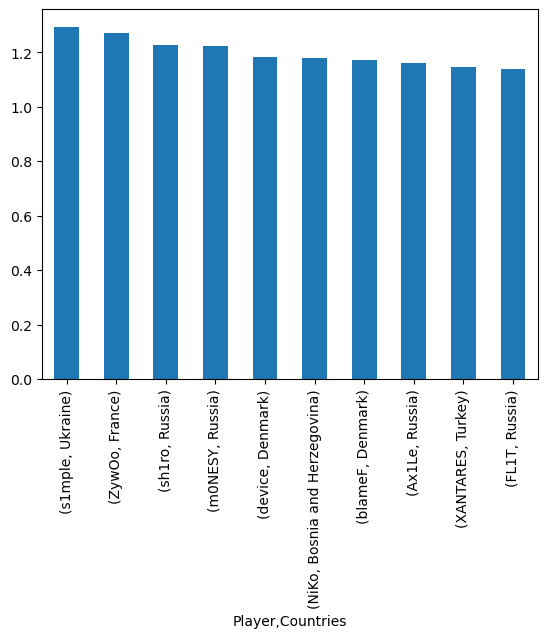

In [43]:
#let's make a graph to visualize better
top10.plot(kind='bar')

In [44]:
#Now using only the names of the 10 best players of the last 4/5 years:

#visualizing how they performed over the years in each category

df_t10=df1.loc[top10.index]
df_t10

K-D Diff                                K/D  \
                                    2020    2021   2022   2023   2024  2020   
Player   Countries                                                            
s1mple   Ukraine                  1083.0  1255.0  672.0    NaN    NaN  1.40   
ZywOo    France                    953.0   888.0  687.0  683.0    NaN  1.31   
sh1ro    Russia                      NaN  1148.0  686.0  682.0    NaN   NaN   
m0NESY   Russia                      NaN     NaN  443.0  420.0  309.0   NaN   
device   Denmark                   727.0   423.0    NaN  517.0    NaN  1.25   
NiKo     Bosnia and Herzegovina    436.0   510.0  310.0  349.0   68.0  1.14   
blameF   Denmark                     NaN   299.0  557.0  366.0    NaN   NaN   
Ax1Le    Russia                      NaN   510.0  340.0  215.0    NaN   NaN   
XANTARES Turkey                    227.0     NaN    NaN    NaN   67.0  1.08   
FL1T     Russia                      NaN     NaN    NaN   91.0   49.0   NaN   

                                                         ...  Rounds          \
                                 2021  2022  2023  2024  ...    2020    2021   
Player   Countries                                       ...                   
s1mple   Ukraine                 1.45  1.35   NaN   NaN  ...  4444.0  4681.0   
ZywOo    France                  1.37  1.32  1.38   NaN  ...  5010.0  4001.0   
sh1ro    Russia                  1.42  1.47  1.36   NaN  ...     NaN  5276.0   
m0NESY   Russia                   NaN  1.23  1.24  1.50  ...     NaN     NaN   
device   Denmark                 1.16   NaN  1.30   NaN  ...  4733.0  4113.0   
NiKo     Bosnia and Herzegovina  1.16  1.15  1.19  1.10  ...  4533.0  4751.0   
blameF   Denmark                 1.12  1.23  1.21   NaN  ...     NaN  3817.0   
Ax1Le    Russia                  1.15  1.20  1.09   NaN  ...     NaN  5276.0   
XANTARES Turkey                   NaN   NaN   NaN  1.11  ...  4533.0     NaN   
FL1T     Russia                   NaN   NaN  1.05  1.09  ...     NaN     NaN   

                                                        Rating              \
                                   2022    2023    2024   2020  2021  2022   
Player   Countries                                                           
s1mple   Ukraine                 3121.0     NaN     NaN   1.28  1.34  1.26   
ZywOo    France                  3611.0  3117.0     NaN   1.28  1.29  1.24   
sh1ro    Russia                  2745.0  3369.0     NaN    NaN  1.22  1.26   
m0NESY   Russia                  3192.0  2941.0  1080.0    NaN   NaN  1.15   
device   Denmark                    NaN  2902.0     NaN   1.20  1.14   NaN   
NiKo     Bosnia and Herzegovina  3192.0  2941.0  1080.0   1.18  1.19  1.20   
blameF   Denmark                 3804.0  2902.0     NaN    NaN  1.13  1.21   
Ax1Le    Russia                  2745.0  3759.0     NaN    NaN  1.16  1.21   
XANTARES Turkey                     NaN     NaN   920.0   1.09   NaN   NaN   
FL1T     Russia                     NaN  2804.0   884.0    NaN   NaN   NaN   

                                             
                                 2023  2024  
Player   Countries                           
s1mple   Ukraine                  NaN   NaN  
ZywOo    France                  1.28   NaN  
sh1ro    Russia                  1.20   NaN  
m0NESY   Russia                  1.17  1.35  
device   Denmark                 1.21   NaN  
NiKo     Bosnia and Herzegovina  1.19  1.13  
blameF   Denmark                 1.18   NaN  
Ax1Le    Russia                  1.11   NaN  
XANTARES Turkey                   NaN  1.20  
FL1T     Russia                  1.12  1.16  

[10 rows x 25 columns]

In [45]:
#Saving the top 10 players data frame
df_t10.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\Top10CS.csv")

In [46]:
#See wich Players/Countries has max rating by year

best_ratings_by_year = {}
for year in df_t10['Rating'].columns:
    max_rate = df_t10['Rating'][year].max()
    temp_df = df_t10.reset_index()
    best_players = list(temp_df['Player'][temp_df['Rating'][year] == max_rate])
    best_ratings_by_year[year] = ' / '.join(best_players)
    
best_ratings_by_year

{2020: 's1mple / ZywOo',
 2021: 's1mple',
 2022: 's1mple / sh1ro',
 2023: 'ZywOo',
 2024: 'm0NESY'}

C:\Users\simao\AppData\Local\Temp\ipykernel_1792\2820258699.py:5: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



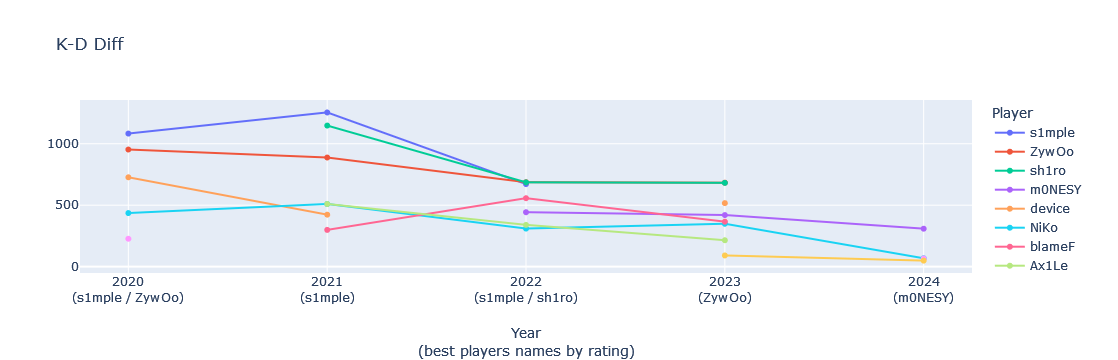

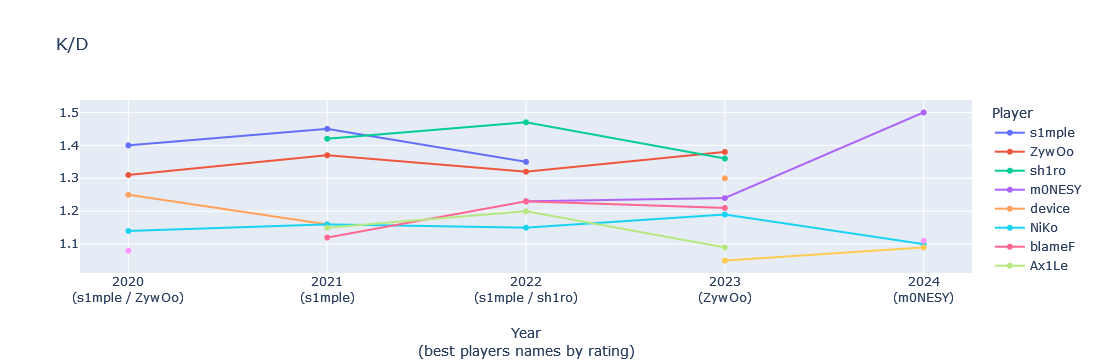

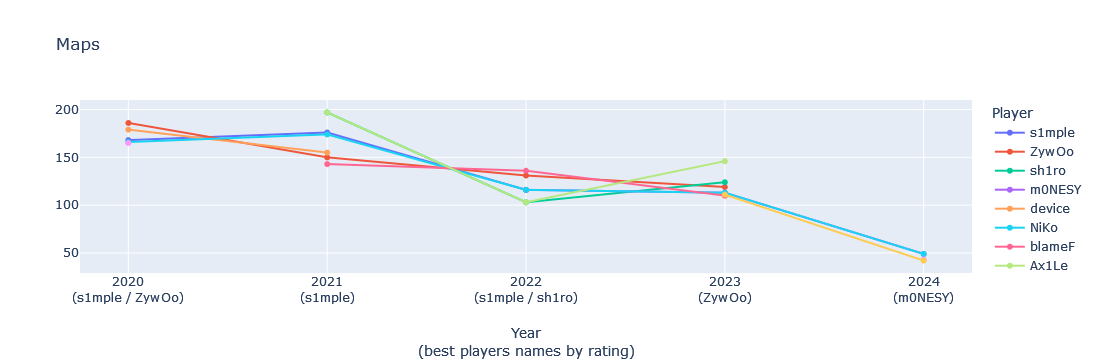

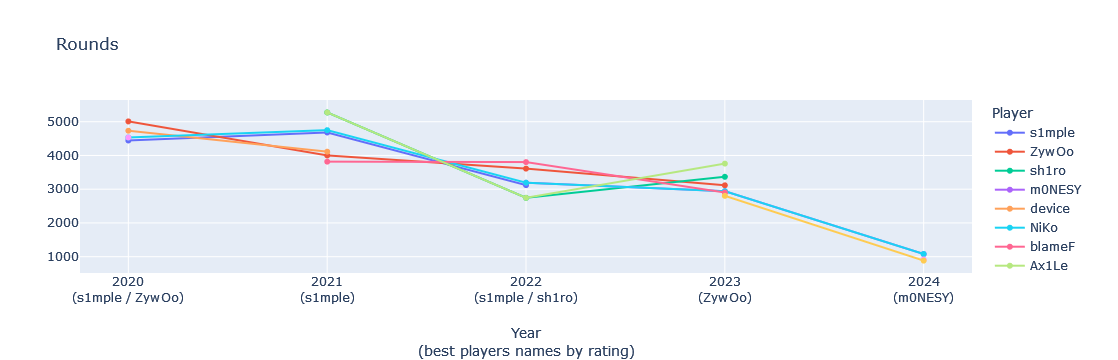

In [132]:
#I'll use plotly.express (px) to make some graphs for better visualization

#Let's make individual graphs for each stat
df_temp=df_t10.reset_index()
df_temp.drop(columns='Countries',inplace=True)
df_temp.set_index('Player',inplace=True)

all_fig={}
for name in list(df_temp.columns.get_level_values(0).unique())[:4]:
    #transpose the graph, so the years are on the x-axis
    fig = px.line(df_temp[name].transpose(), title=name, markers=True)
    #Adjustments:
    #Change the graph titles 
    #making comparison easier:
        #remove years with numbers 0.5
        #put the names of the best players by rating below the year
    fig.update_layout(yaxis_title='',xaxis_title='Year<br>(best players names by rating)',legend_title='Player', 
                      xaxis=dict(
                          tickvals=df_temp.columns.get_level_values(1).unique(),
                          ticktext=[f"{year}<br>({players})" for year, players in best_ratings_by_year.items()]
                      )
                     )
    all_fig[name] = fig
    file = name
    if file == 'K/D':
        file = 'KD'
    fig.show()
    fig.write_html(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CsGraphs/"+file+" players_graph.html")
    #fig.write_image(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CsGraphs/"+file+"_graph.png")

In [49]:
#now let's scrape the teams information

from IPython.display import display, HTML
from bs4 import BeautifulSoup
import pandas as pd
import re
import pandas as pd
import requests
import smtplib
import time
import datetime

current_year = 2024

while current_year >= 2020: 
    URL = f'https://www.hltv.org/stats/teams?startDate={current_year}-01-01&endDate={current_year}-12-31&rankingFilter=Top20'
    h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0'}
    page = requests.get(URL, headers=h)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    
    table = soup.find('table', class_='stats-table player-ratings-table')
    headers = list(head.get_text() for head in table.find_all('th'))
    df_teams = pd.DataFrame(columns=headers)
    df_teams.rename(columns={'Rating2.0': 'Rating (2.0)'}, inplace=True)
    all_rows = table.find_all('tr')[1:11]

    for row in all_rows:
        table_data = row.find_all('td')
        td_texts = [td.get_text(strip=True) for td in table_data] 
        length = len(df_teams)
        df_teams.loc[length] = td_texts
        
    countries = [row.find(class_="flag")['alt'] for row in all_rows]
    df_teams['Countries'] = countries
    
    new_order = ['Team', 'Countries', 'Maps', 'K-D\xa0Diff', 'K/D', 'Rating (2.0)']
    df_teams = df_teams[new_order]
    df_teams.columns = [f"{head} ({current_year})" if head not in ['Team', 'Countries'] else head for head in df_teams.columns]

    year_csv = str (current_year)
    df_teams.to_excel(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\Excelteams\Teams "+year_csv+".xlsx")
    df_teams.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams "+year_csv+".csv")
    
    current_year -= 1

In [50]:
#putting all CSV in a big organized data frame like before

df_24t = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams 2024.csv")
df_23t = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams 2023.csv")
df_22t = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams 2022.csv")
df_21t = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams 2021.csv")
df_20t = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CSVteams\Teams 2020.csv")

dfts = [df_24t,df_23t,df_22t,df_21t,df_20t]

big_dft = pd.concat(dfts)
big_dft.drop(big_dft.columns[0], axis=1, inplace=True)
#big_dft.drop(big_dft.columns[2], axis=1, inplace=True)

big_dft = big_dft.groupby(by=['Team','Countries']).mean().sort_index(axis=1)
#big_dft

up = list(big_dft.columns)
uppers = []
for u in up:
    u = u.split('(')[0].strip()
    uppers.append(u)
    
uppers = set(uppers)
uppers = list(uppers)
uppers.sort()

years = [2020, 2021, 2022, 2023, 2024]
multi_index = pd.MultiIndex.from_product([uppers, years])
data = big_dft.values
big_dft_fixed = pd.DataFrame(data, index=big_dft.index, columns=multi_index)

sum_na = big_dft_fixed['K/D'].loc[:, '2020':'2024'].isna().sum(axis=1)
big_dft_fixed = big_dft_fixed[sum_na != 4]
top10=big_dft_fixed['Rating'].mean(axis=1).sort_values(ascending=False)[:10]
big_dft_fixed=big_dft_fixed.loc[top10.index]
#big_dft_fixed
big_dft_fixed.to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\Top10Teams.csv")

In [51]:
big_dft_fixed

K-D Diff                                K/D        \
                            2020    2021   2022   2023   2024  2020  2021   
Team          Countries                                                     
Vitality      Europe         NaN     NaN    NaN  891.0  166.0   NaN   NaN   
Spirit        Russia         NaN   -71.0  248.0    NaN  417.0   NaN  0.99   
Natus Vincere Russia       674.0  1573.0    NaN    NaN    NaN  1.05  1.11   
Cloud9        Russia         NaN     NaN  441.0  361.0   71.0   NaN   NaN   
Natus Vincere Ukraine        NaN     NaN  758.0   44.0    NaN   NaN   NaN   
Virtus.pro    Russia         NaN     NaN    NaN  356.0   75.0   NaN   NaN   
FaZe          Europe       181.0     NaN  790.0  361.0  223.0  1.01   NaN   
FURIA         Brazil       703.0     NaN  121.0    NaN    NaN  1.06   NaN   
Astralis      Denmark     1095.0  -496.0    NaN  136.0    NaN  1.07  0.96   
HEROIC        Denmark        NaN   215.0  415.0  376.0    NaN   NaN  1.02   

                                            Maps                             \
                         2022  2023  2024   2020   2021   2022   2023  2024   
Team          Countries                                                       
Vitality      Europe      NaN  1.09  1.07    NaN    NaN    NaN  118.0  35.0   
Spirit        Russia     1.05   NaN  1.19    NaN   97.0   60.0    NaN  35.0   
Natus Vincere Russia      NaN   NaN   NaN  168.0  176.0    NaN    NaN   NaN   
Cloud9        Russia     1.08  1.03  1.03    NaN    NaN   65.0  157.0  39.0   
Natus Vincere Ukraine    1.08  1.00   NaN    NaN    NaN  118.0  113.0   NaN   
Virtus.pro    Russia      NaN  1.05  1.03    NaN    NaN    NaN   89.0  42.0   
FaZe          Europe     1.06  1.03  1.05  152.0    NaN  148.0  162.0  63.0   
FURIA         Brazil     1.02   NaN   NaN  132.0    NaN   89.0    NaN   NaN   
Astralis      Denmark     NaN  1.01   NaN  179.0  140.0    NaN  110.0   NaN   
HEROIC        Denmark    1.04  1.04   NaN    NaN  136.0  126.0  108.0   NaN   

                        Rating                          
                          2020  2021  2022  2023  2024  
Team          Countries                                 
Vitality      Europe       NaN   NaN   NaN  1.10  1.11  
Spirit        Russia       NaN  1.03  1.07   NaN  1.19  
Natus Vincere Russia      1.07  1.11   NaN   NaN   NaN  
Cloud9        Russia       NaN   NaN  1.10  1.05  1.09  
Natus Vincere Ukraine      NaN   NaN  1.08  1.07   NaN  
Virtus.pro    Russia       NaN   NaN   NaN  1.07  1.08  
FaZe          Europe      1.04   NaN  1.07  1.07  1.08  
FURIA         Brazil      1.09   NaN  1.04   NaN   NaN  
Astralis      Denmark     1.08  1.04   NaN  1.06   NaN  
HEROIC        Denmark      NaN  1.04  1.06  1.06   NaN

In [83]:
#When I tried to do the same code I did it befor for players it was giving me an error (because of multi-index), so let's make in other way

#Saving all stats in csv
df_teams_temp=big_dft_fixed.reset_index()
df_teams_temp.drop(columns='Countries',inplace=True)
df_teams_temp.set_index('Team',inplace=True)
#df_teams_temp
num = 1
for stat in df_teams_temp.columns.get_level_values(0).unique():
    
    df_teams_temp[stat].transpose().to_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\Test"+str(num)+".csv")
    num +=1
    

C:\Users\simao\AppData\Local\Temp\ipykernel_1792\2845728168.py:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [122]:
#reading them again

df_diff = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\K-D.csv").set_index(df_diff.columns[0])
df_kd = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\KD.csv").set_index(df_kd.columns[0])
df_map = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\Maps.csv").set_index(df_map.columns[0])
df_rating = pd.read_csv(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\Rating.csv").set_index(df_rating.columns[0])


all_stats = [df_diff,df_kd,df_map]



In [123]:
#Showing the best team by year
best_team_by_year={}
for y in df_rating.transpose().columns:
    #print (df_rating.transpose()[y].max())
    best_team = df_rating.transpose().loc[df_rating.transpose()[y]==df_rating.transpose()[y].max()].index
    best_team_by_year[y]=' / '.join(best_team)
best_team_by_year   

{2020: 'FURIA',
 2021: 'Natus Vincere',
 2022: 'Cloud9',
 2023: 'Vitality',
 2024: 'Spirit'}

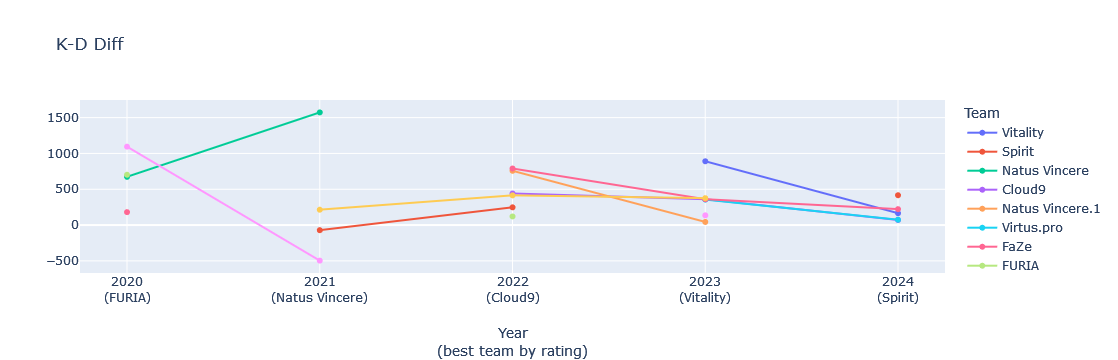

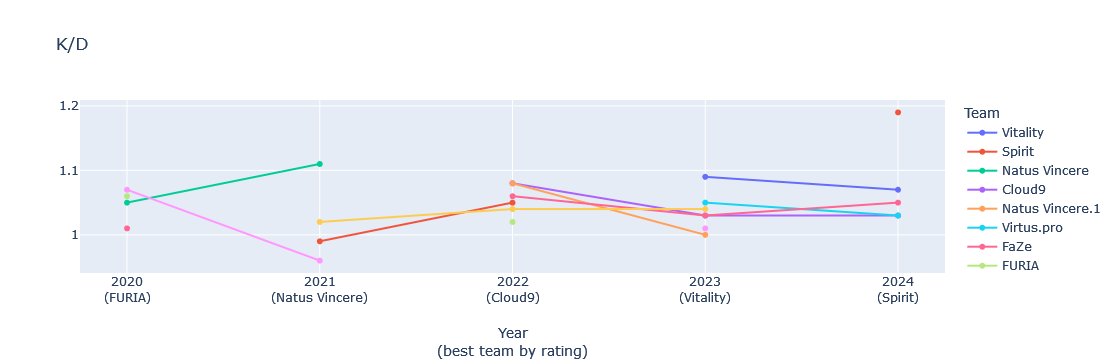

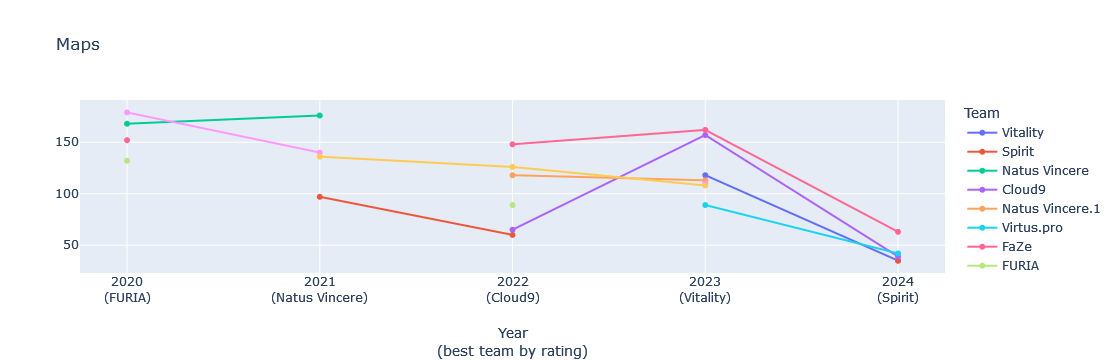

In [133]:
#Finaly doing the graphs

for stat, name in zip(all_stats,df_teams_temp.columns.get_level_values(0).unique()):
    fig_teams = px.line(stat,title=name , markers=True)
    #Adjustments:
    #making comparison easier:
        #remove years with numbers 0.5
    fig_teams.update_layout(yaxis_title='',xaxis_title='Year<br>(best team by rating)',legend_title='Team', 
                      xaxis=dict(tickvals=df_teams_temp.columns.get_level_values(1).unique(), ticktext=[f"{year}<br>({team})" for year, team in best_team_by_year.items()])           
                     )
    
    fig_teams.show()
    file = name
    if file == 'K/D':
        file = 'KD'
    fig_teams.write_html(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CsGraphs/"+file+" teams_graph.html")
    #fig_teams.write_image(r"C:\Users\simao\OneDrive\Ambiente de Trabalho\CS PROJECT\CsGraphs/"+file+" teams_graph.png")

In [ ]:
######################################################################################################

# Project Challenges and Solutions

# Throughout the project, challenges arose from unexpected errors and the complexities of data handling.
# Creative solutions were necessary, especially in data visualization with Plotly and file naming conventions to avoid directory issues.
# E.g., renaming 'k/d' to avoid path conflicts

# Community Support and Learning

# Forums such as 'Stack Overflow' played a crucial role in overcoming obstacles, providing a wealth of knowledge and troubleshooting advice.
# This community-driven approach significantly accelerated the problem-solving process.

# Leveraging AI for Efficiency

# AI tools greatly enhanced productivity, transforming tasks that would typically take hours into much shorter endeavors.
# This efficiency not only sped up programming tasks but also facilitated the use of other technologies like SQL, Excel, PowerBI, and Tableau.

######################################################################################################

# Insights into Esports Performance Over Five Years

# Over the last five years, s1mple has consistently demonstrated top-tier skills, standing out as a leading player.
# His enduring ability to compete at the highest levels underscores his exceptional talent.

# The analysis of Maps and Rounds reveals a tight competition among many players, showing the significant influence of team dynamics on these metrics.
# This reflects the complex interplay between individual skills and team performance.

# Future Prospects in Esports

# m0NESY is showing signs of rising as a formidable competitor in the esports arena.
# His upward trajectory suggests a bright future, positioning him as a potential leader in the field.

# Team Consistency and Future Predictions

# Teams have shown varied levels of consistency, with no single team consistently dominating the Top1 Rating.
# This variability makes it difficult to predict future leaders, highlighting the dynamic nature of competitive esports.

######################################################################################################